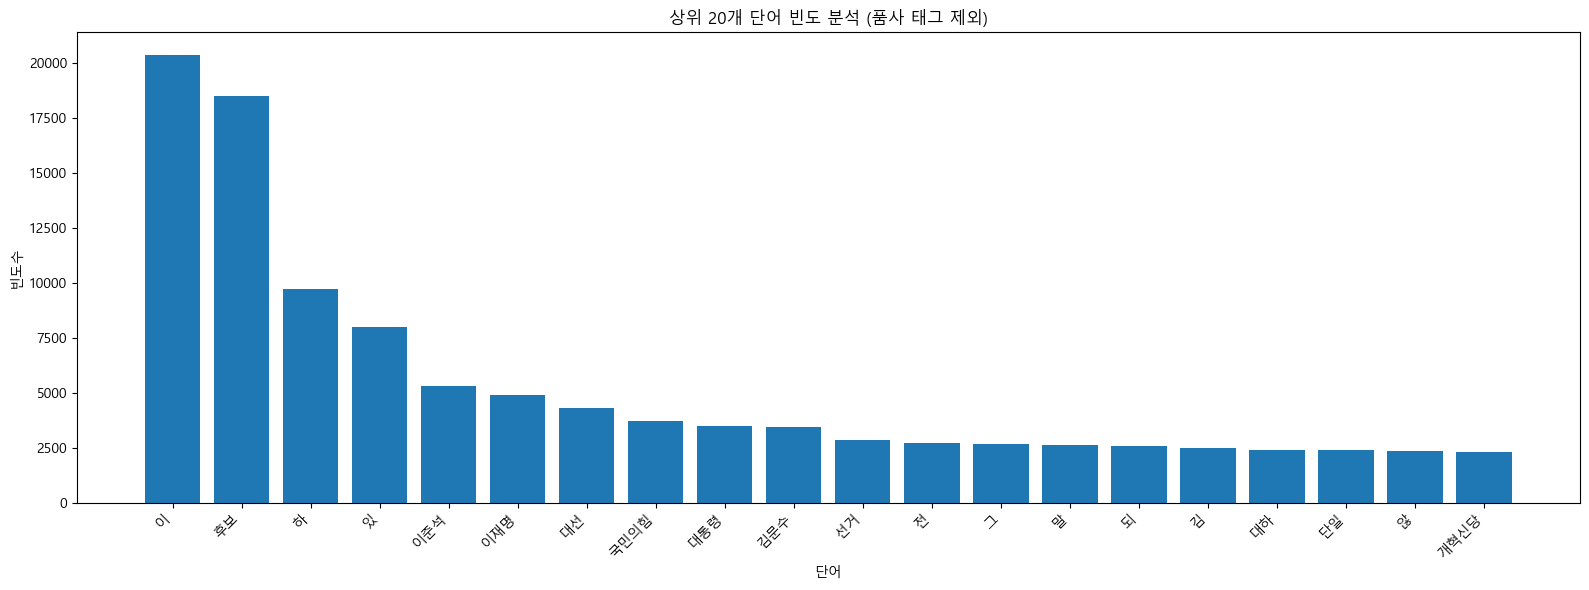

In [ ]:
# 일반 빈도 20개 (불용어 포함)
 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter

# 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv("lee_junseok_tagged_filtered_ver2.csv")

# 'tagged' 컬럼에서 단어만 추출 (ex: '이준석(NNP)' → '이준석')
tokenized_sentences = df['tagged'].dropna().tolist()
all_tokens = []

for sentence in tokenized_sentences:
    for token in sentence.split():
        if '(' in token and ')' in token:
            word = token.rsplit('(', 1)[0]  # 괄호 앞 단어만 추출
            all_tokens.append(word)

# 빈도 계산
counter = Counter(all_tokens)
most_common = counter.most_common(20)
words, freqs = zip(*most_common)

# 시각화
plt.figure(figsize=(16, 6))
plt.bar(words, freqs)
plt.xticks(rotation=45, ha='right')
plt.title("상위 20개 단어 빈도 분석 (품사 태그 제외)")
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.tight_layout()
plt.show()


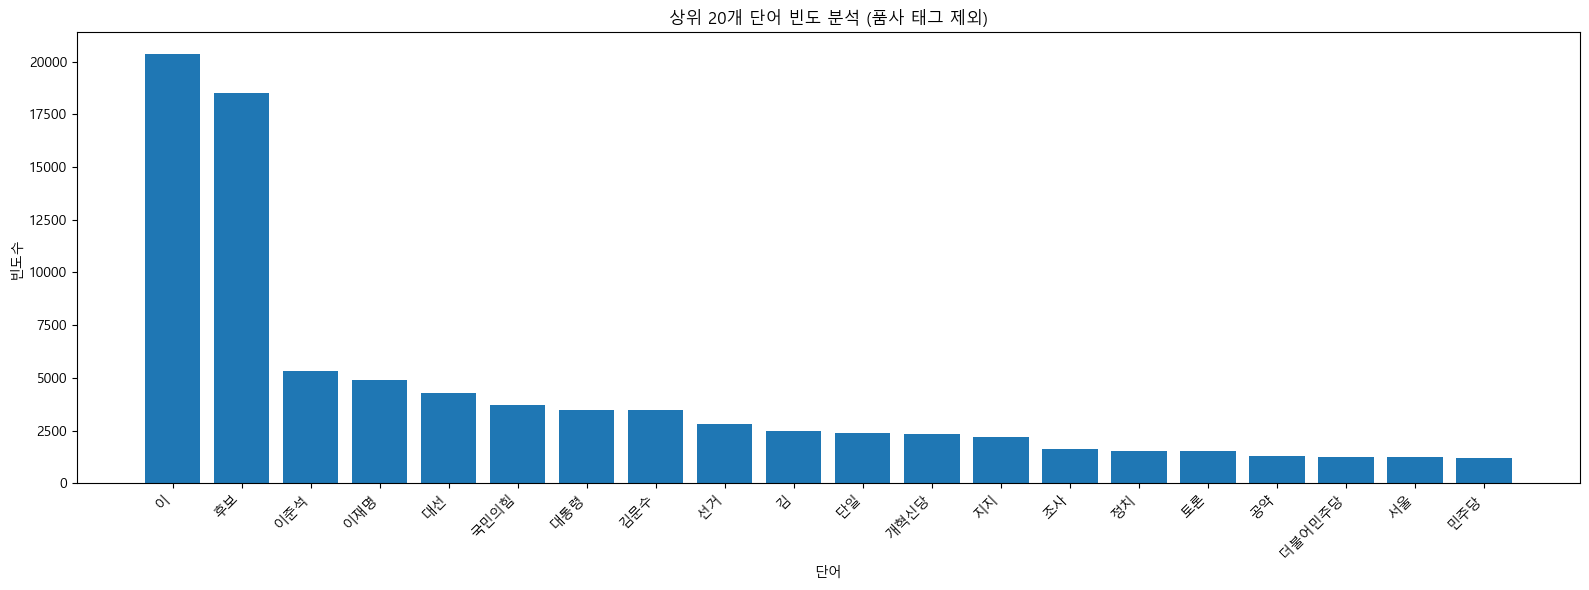

In [ ]:
# 쓸모 없는 단어 제거한 버전, 상위 20개

ban_prefixes = {"하", "있", "전", "그", "되", "대하", "않", "없", "보", "말", "아니", "주", "저", "이날", "위하"}

all_tokens = []
for sentence in tokenized_sentences:
    for token in sentence.split():
        if '(' in token and ')' in token:
            word = token.rsplit('(', 1)[0]
            if not any(word.startswith(prefix) for prefix in ban_prefixes):
                all_tokens.append(word)



# 빈도 계산
counter = Counter(all_tokens)
most_common = counter.most_common(20)
words, freqs = zip(*most_common)

# 시각화
plt.figure(figsize=(16, 6))
plt.bar(words, freqs)
plt.xticks(rotation=45, ha='right')
plt.title("상위 20개 단어 빈도 분석 (품사 태그 제외)")
plt.xlabel("단어")
plt.ylabel("빈도수")
plt.tight_layout()
plt.show()